In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

df = pd.read_csv("Task_4.csv")
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [2]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [3]:
df['trending_date'] = pd.to_datetime(df['trending_date'] , format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'] , format='%Y-%m-%dT%H:%M:%S.%fZ')

df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [4]:
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_year']=df['publish_time'].dt.year

df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,publish_day,publish_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,13,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",11,13,2017


In [5]:
df['views'] = df['views'].fillna(df['views'].median())
df['likes'] = df['likes'].fillna(df['likes'].median())
df['dislikes'] = df['dislikes'].fillna(df['dislikes'].median())
df['comment_count'] = df['comment_count'].fillna(df['comment_count'].median())

df['category_id'] = df['category_id'].fillna(df['category_id'].mode().iloc[0])

In [6]:
df = df.dropna(thresh=df.shape[1] - 3)

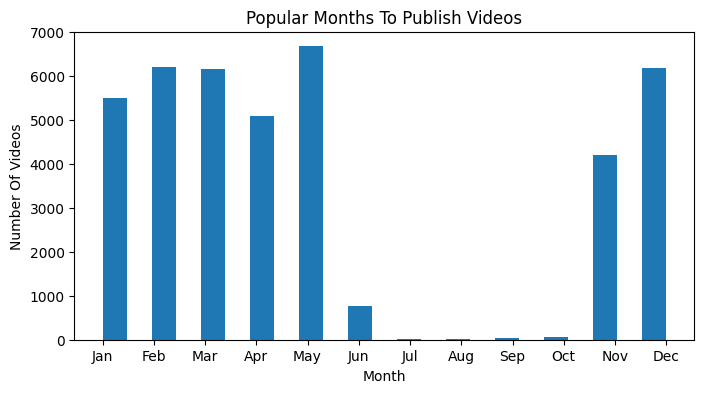

In [7]:
plt.figure(figsize=(8,4))
plt.hist(df['publish_month'], bins=23)
plt.title('Popular Months To Publish Videos', fontsize=12)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number Of Videos', fontsize=10)
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

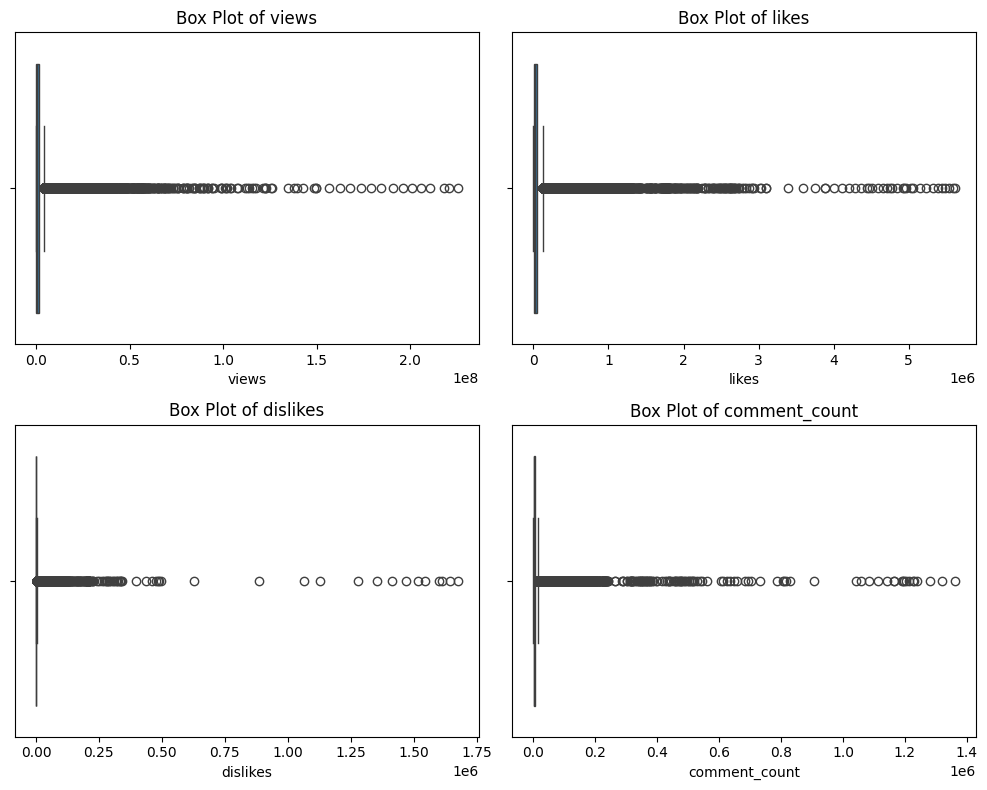

In [8]:
var1 = ['views', 'likes', 'dislikes', 'comment_count']
plt.figure(figsize=(10, 8))
for i, col in enumerate(var1, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


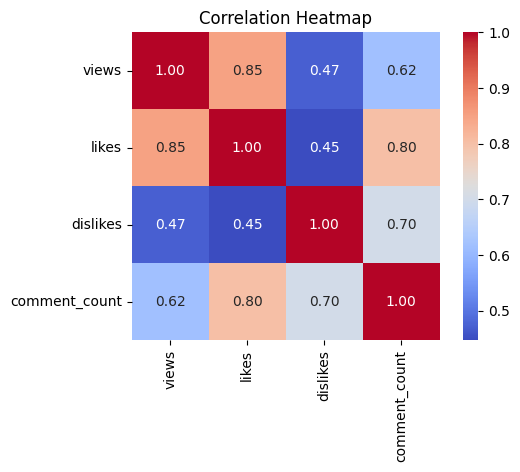

In [9]:
matrix = df[var1].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

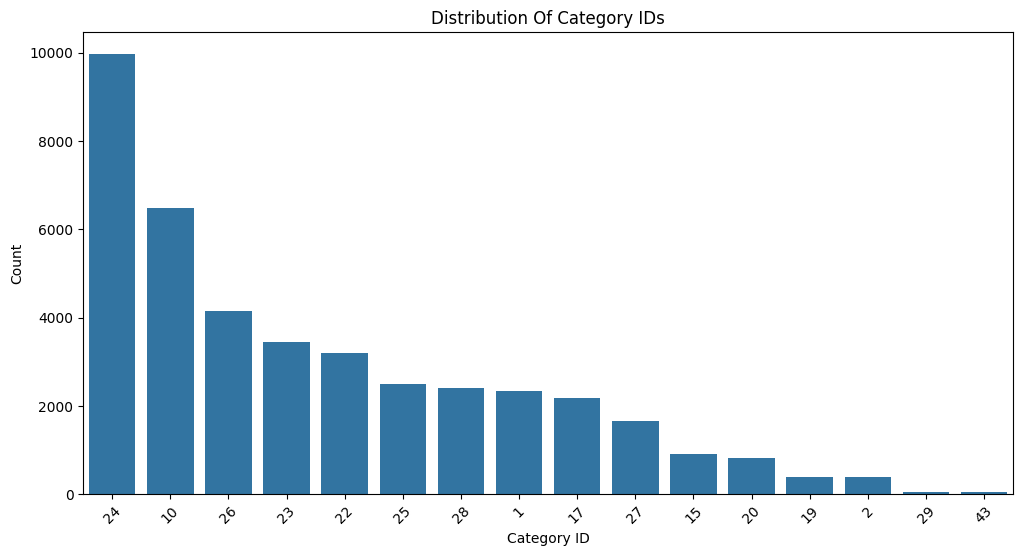

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category_id', order=df['category_id'].value_counts().index)
plt.title('Distribution Of Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

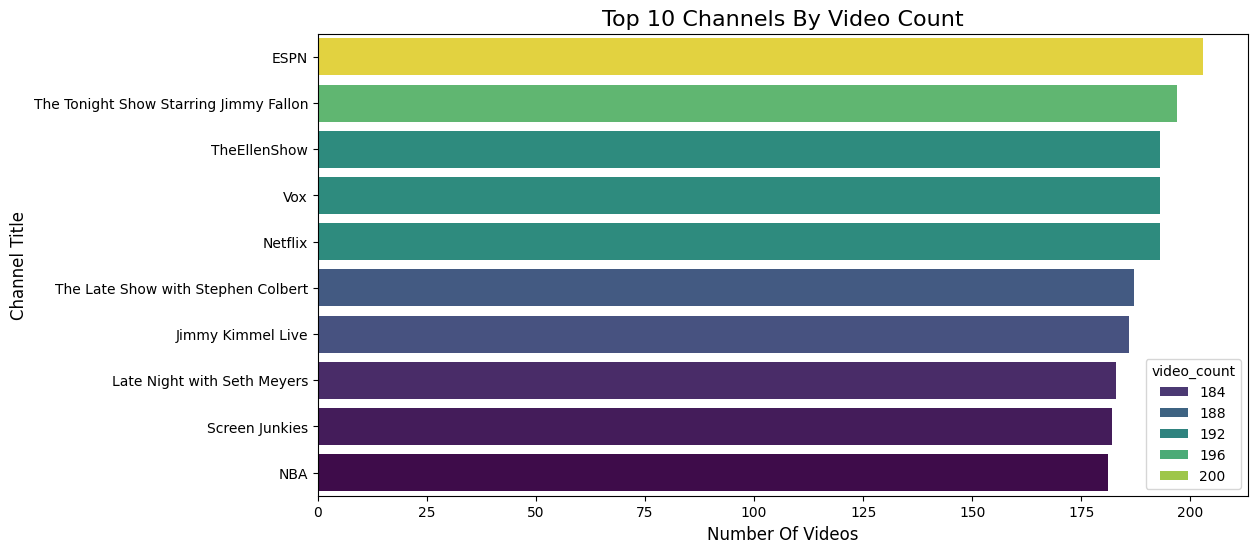

In [11]:
top_channels = df['channel_title'].value_counts().nlargest(10)
top_channels = top_channels.reset_index()
top_channels.columns = ['channel_title', 'video_count']
plt.figure(figsize=(12, 6))
sns.barplot(data=top_channels, y='channel_title', x='video_count', hue='video_count', palette='viridis')
plt.title('Top 10 Channels By Video Count', fontsize=16)
plt.xlabel('Number Of Videos', fontsize=12)
plt.ylabel('Channel Title', fontsize=12)
plt.show()

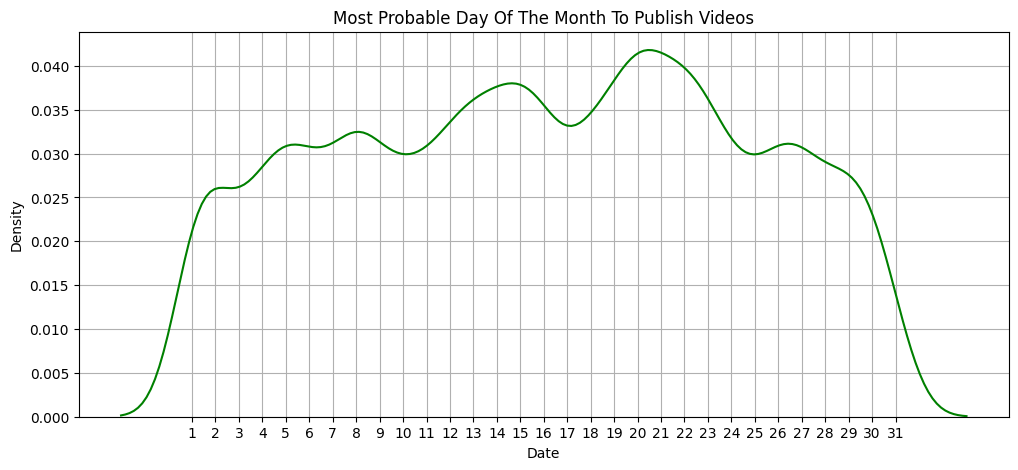

In [12]:
plt.figure(figsize=(12,5))
sns.kdeplot(df['publish_day'], color='green')
plt.title("Most Probable Day Of The Month To Publish Videos")
plt.xlabel('Date')
plt.xticks(range(1,32))
plt.grid()
plt.show()

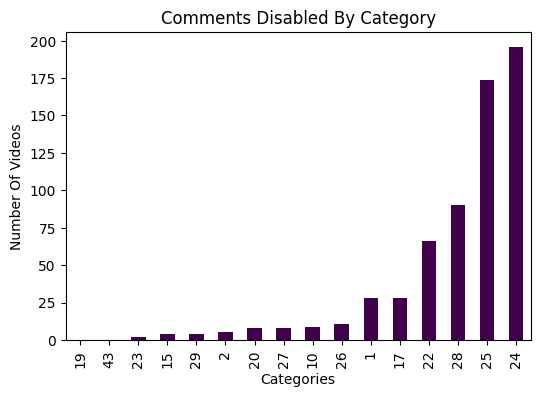

In [13]:
df.groupby('category_id')['comments_disabled'].sum().sort_values(ascending=True).plot(kind='bar', figsize=(6,4), cmap='PRGn')
plt.title('Comments Disabled By Category', fontsize=12)
plt.xlabel('Categories')
plt.ylabel('Number Of Videos')
plt.show()